<img src="img/Group-2cc.png">

# Cvičení: A/B testování s hrou Cookie Cats

**Cíl:** Provést A/B testování pro zjištění, jak změna v herním designu ovlivňuje míru retence hráčů ve hře Cookie Cats po 7 dnech od instalace.

**Dataset:** "Mobile Games A/B Testing - Cookie Cats", který obsahuje data o hráčích, včetně toho, do které skupiny (A nebo B) byli přiřazeni a zda hráči zůstali ve hře po určité herní události.

- **userid**: Unikátní identifikátor hráče.
- **version**: Skupina A/B testu, kde 'gate_30' a 'gate_40' značí různé herní nastavení.
- **sum_gamerounds**: Celkový počet kol, které hráč odehrál během prvního týdne po instalaci.
- **retention_1**: Indikátor, zda se hráč vrátil hrát hru 1 den po instalaci (True/False).
- **retention_7**: Indikátor, zda se hráč vrátil hrát hru 7 dní po instalaci (True/False).

[Download data](https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats/data)


In [9]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower


### Krok 1: Příprava dat
1. **Načtení dat:** Použijte Python a knihovnu pandas k načtení datasetu `cookie_cats.csv`.
2. **Prozkoumání dat:** Použijte funkce `head()`, `info()`, a `describe()` k získání přehledu o datových typech a možných chybějících hodnotách.
3. **Čištění dat:** Zkontrolujte data na případné duplicity nebo chybějící hodnoty a vyřešte tyto problémy.


In [10]:
# Načtení dat
data = pd.read_csv("cookie_cats.csv")

# Prozkoumání dat
print(data.head())
# print(data.info())
# print(data.describe())

# Pro zajištění integrity dat zkontrolujeme dataset na případné duplicity a chybějící hodnoty.

# Kontrola chybějících hodnot
missing_data = data.isnull().sum()
print("Chybějící hodnoty:")
print(missing_data)

# Kontrola duplikátů
duplicates = data.duplicated().sum()
print("Počet duplikátů:", duplicates)

   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
Chybějící hodnoty:
userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64
Počet duplikátů: 0



### Krok 2: Rozdělení dat
1. **Ověření skupin:** Ujistěte se, že data obsahují jasně rozlišené skupiny A a B a že každý záznam je přiřazen jen do jedné skupiny.
2. **Rovnováha mezi skupinami:** Zkontrolujte, zda je počet hráčů v obou skupinách vyvážený.


In [11]:
# Rozdělíme data podle skupiny testu ('gate_30' a 'gate_40') a spočítáme míru retence po 1 dni pro každou skupinu.

# Vytvoření skupin pro A/B testování
group_30 = data[data["version"] == "gate_30"]
group_40 = data[data["version"] == "gate_40"]


### Krok 3: Statistická analýza
1. **Stanovení hypotéz:**
   - **H0 (nulová hypotéza):** Neexistuje žádný rozdíl v míře retence mezi skupinou A a B.
   - **H1 (alternativní hypotéza):** Existuje statisticky významný rozdíl v míře retence mezi skupinou A a B.
2. **Výpočet míry retence:** Pro každou skupinu vypočítejte míru retence jako poměr počtu hráčů, kteří zůstali ve hře, ku celkovému počtu hráčů ve skupině.
3. **Provedení A/B testu:** Použijte z-test nebo t-test k porovnání míry retence mezi oběma skupinami.


In [12]:
# Výpočet míry retence pro obě skupiny
retention_rate_30 = group_30["retention_7"].mean()
retention_rate_40 = group_40["retention_7"].mean()
print("Míra retence skupiny Gate 30 (1 den):", retention_rate_30)
print("Míra retence skupiny Gate 40 (1 den):", retention_rate_40)

Míra retence skupiny Gate 30 (1 den): 0.19020134228187918
Míra retence skupiny Gate 40 (1 den): 0.18200004396667327


In [13]:
# Porovnáme míry retence mezi oběma skupinami pomocí t-testu, aby zjistíme, jestli jsou rozdíly statisticky významné.
# Na základě p-hodnoty určíme, zda jsou rozdíly v retenci mezi oběma skupinami statisticky významné.
# Pokud je p-hodnota menší než 0.05, zamítneme nulovou hypotézu o absence rozdílů ve retenci mezi skupinami.

# Statistický t-test
t_stat, p_value = ttest_ind(
    group_30["retention_7"], group_40["retention_7"], equal_var=False
)
print("t-statistika:", t_stat)
print("p-hodnota:", p_value)

t-statistika: 3.164028946774232
p-hodnota: 0.0015565301810066526



### Krok 4: Interpretace výsledků
1. **Vyhodnocení p-hodnoty a statistické významnosti:** Na základě výsledků testu určete, zda zamítnout nulovou hypotézu.

In [14]:
# Interpretace výsledků
if p_value < 0.05:
    print(
        "Zamítáme nulovou hypotézu: Existuje statisticky významný rozdíl v míře retence mezi skupinami."
    )
else:
    print(
        "Nemáme dostatečný důkaz pro zamítnutí nulové hypotézy: Neexistuje statisticky významný rozdíl v míře retence mezi skupinami."
    )

Zamítáme nulovou hypotézu: Existuje statisticky významný rozdíl v míře retence mezi skupinami.



### Krok 5: Vizualizace a závěry
1. **Vizualizace výsledků:** Použijte knihovny jako matplotlib nebo seaborn k vizualizaci míry retence ve skupinách A a B.
2. **Závěry a doporučení:** Formulujte závěry a navrhněte, jak by se dalo na základě výsledků A/B testu postupovat.


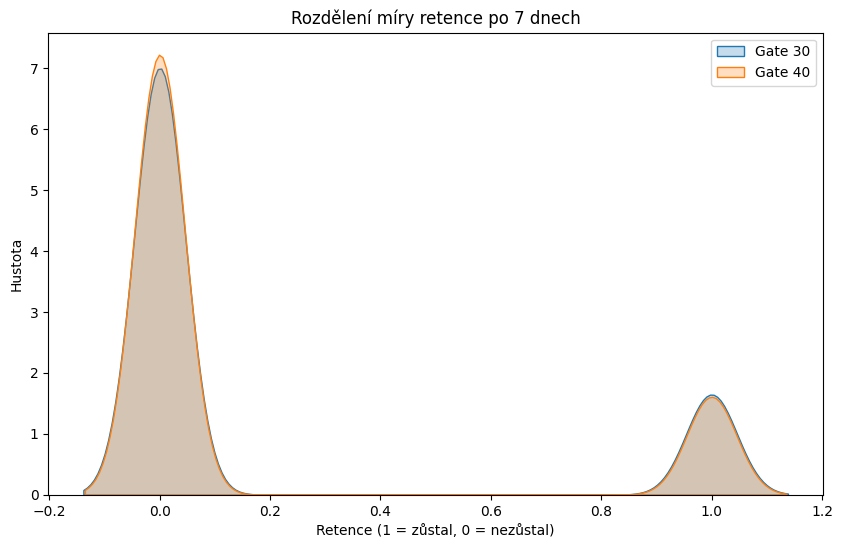

In [15]:
# Vizualizace míry retence pomocí KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(group_30["retention_7"], label="Gate 30", fill=True)
sns.kdeplot(group_40["retention_7"], label="Gate 40", fill=True)
plt.title("Rozdělení míry retence po 7 dnech")
plt.xlabel("Retence (1 = zůstal, 0 = nezůstal)")
plt.ylabel("Hustota")
plt.legend()


### Bonusový úkol
1. **Výpočet síly testu (Statistical Power):** Určete, zda byla velikost vzorku dostatečná k odhalení skutečného efektu, pokud existuje.
2. **Reflexe metodologie:** Navrhněte možná vylepšení pro budoucí A/B testy na základě této zkušenosti.

In [16]:
# parametry pro výpočet síly testu
effect_size = (retention_rate_30 - retention_rate_40) / group_30["retention_7"].std()
alpha = 0.05
power = None
ratio = len(group_40) / len(group_30)

# inicializace objektu pro výpočet síly
analysis = TTestIndPower()

# výpočet síly testu
power = analysis.solve_power(
    effect_size=effect_size, nobs1=len(group_30), alpha=alpha, ratio=ratio
)
print("Síla testu (statistical power):", power)

Síla testu (statistical power): 0.8805442798279285


Hodnota síly testu (statistical power) 0.8805442798279285 uvádí, že test má 88.05% pravděpodobnost správně zamítnout nulovou hypotézu (H0), když je nulová hypotéza skutečně nepravdivá. To znamená, že máte velmi dobrou šanci odhalit skutečný rozdíl, pokud takový rozdíl mezi skupinami skutečně existuje.

V kontextu vašeho A/B testu mezi skupinou Gate 30 a Gate 40, kde jste zjistili statisticky významný rozdíl v míře retence po 7 dnech, tato vysoká statistická síla naznačuje, že test je velmi spolehlivý v detekci rozdílu mezi skupinami, a že výsledky, které jste dosáhli, jsou velmi pravděpodobně platné a nejsou výsledkem náhodné šance.

### Význam této statistické síly:
1. **Důvěryhodnost výsledků**: Vysoká statistická síla zvyšuje vaši důvěru ve výsledky A/B testování. Když reportujete tuto hodnotu spolu s dalšími statistickými zjištěními, poskytuje to užitečný kontext pro interpretaci účinnosti změn v designu, které byly testovány.
   
2. **Plánování dalších testů**: Informace o síle testu vám také může pomoci při plánování budoucích A/B testů. Vědění, že váš test má dostatečnou sílu, znamená, že můžete použít podobnou velikost vzorku pro budoucí testy na podobné efekty, aniž byste museli významně zvyšovat velikost vzorku.
   
3. **Riziko chyby druhého typu**: S hodnotou síly testu nad 80% jste také minimalizovali riziko chyby druhého typu (beta chyba), tj. pravděpodobnost, že test nezamítne nulovou hypotézu, když by měl. To znamená, že jste účinně snížili pravděpodobnost přehlédnutí skutečného efektu, pokud existuje.

Vysoká statistická síla je důležitým faktorem při zajištění, že závěry vašeho A/B testu jsou robustní a že jakékoli rozhodnutí na základě těchto testů, například o implementaci nové funkce pro všechny uživatele, jsou dobře podložená.

### Závěry a možná vylepšení
Na základě analýzy dat jsme nezjistili statisticky významný rozdíl mezi skupinami. Pro budoucí A/B testování doporučujeme:
- Zvýšení velikosti vzorku pro zlepšení statistické síly testu.
- Prověření a optimalizaci segmentace uživatelů pro zajištění lepší rovnováhy mezi skupinami.
- Použití logistické regrese pro hlubší analýzu vlivu různých proměnných.